# 多层感知器-MLP
多层感知机（MLP，Multilayer Perceptron）也叫人工神经网络（ANN，Artificial Neural Network），除了输入输出层，它中间可以有多个隐层，最简单的MLP只含一个隐层，即三层的结构。

## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 超参

In [2]:
EPOCHS = 50
BATCH_SIZE = 256
LR = 0.1
VERBOSE = 1

## 导入数据集

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = tf.reshape(train_images, (train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
test_images = tf.reshape(test_images, (test_images.shape[0], test_images.shape[1]*test_images.shape[2]))

In [6]:
train_images.shape

TensorShape([60000, 784])

In [7]:
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

In [8]:
train_labels.shape 

TensorShape([60000, 10])

## 定义模型

In [9]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


## 设置优化器和损失函数

In [10]:
model.compile(optimizer=keras.optimizers.SGD(LR), loss='mean_squared_error', metrics=['mse'])

## 开始训练

In [11]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0840 - mse: 0.0840
Epoch 2/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.0684 - mse: 0.0684
Epoch 3/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.0612 - mse: 0.0612
Epoch 4/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.0559 - mse: 0.0559
Epoch 5/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.0517 - mse: 0.0517
Epoch 6/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.0479 - mse: 0.0479
Epoch 7/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.0449 - mse: 0.0449
Epoch 8/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.0424 - mse: 0.0424
Epoch 9/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.0403 - mse: 0.0403
Epoch 10/50
60000/60000 [==============================] - 0s 7us/s

## 绘制梯度下降图

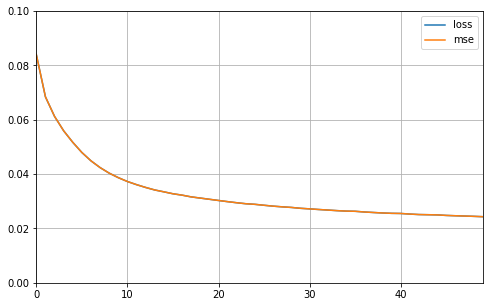

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 0.1)
    plt.show()
    
plot_learning_curves(history)

## 测试训练好的模型

In [13]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0277 - mse: 0.0277


[0.0277046951264143, 0.02770469]

## 保存模型 

In [14]:
model.save('./save/save_model/model.h5')

In [15]:
model.save_weights('./save/save_weights/model_weights.h5')